# Plot facereader points

In [1]:
from os.path import join, isfile
from os import listdir
from PIL import Image
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import csv
import itertools
from scipy.spatial import distance
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

In [2]:
import classifiers_general

In [3]:
def get_pairs(length):
    pairs = []
    combs = [comb for comb in itertools.combinations([*range(0, length)], 2)]
    for comb in combs:
        a = comb[0]
        b = comb[1]  
        pairs.append([a, b])
    
    return pairs

def get_distances(keypoints):
    feats  = []
    combs = [comb for comb in itertools.combinations([*range(0, len(keypoints))], 2)]
    for comb in combs:
        a = comb[0]
        b = comb[1]
        feats.append(distance.euclidean(keypoints[a], keypoints[b]))
    
    return feats

## From landmark to all distances for syndromic files - run only once

## From landmark to all distances for control files - run only once

# Get most important distance for RF classifcation

In [4]:
def get_important_features(syn_name, data_dir, nr_feats): 

    method = "facereader-landmarks-distances"
    syn_csv = data_dir+"\\representations\{}-patients-{}.csv".format(syn_name, method)
    ID_csv  = data_dir+"\\representations\ID-controls-{}.csv".format(method)
    data_fr, labels_fr = classifiers_general.read_rep(syn_name, syn_csv, ID_csv, data_dir)

    data, labels  = [], []
    for index, data_i in enumerate(data_fr):
        if not all(v == 0 for v in data_i):
            data.append(data_i) 
            labels.append(labels_fr[index])

    forest = RandomForestClassifier(n_estimators=10,random_state=0) # 10 has been found with best aroc scores
    forest.fit(data, labels)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
    indices = np.argsort(importances)[::-1]
    important_indices = indices[0:nr_feats] 

    print(sum(importances[important_indices]))

    data2 = []
    for row in data:
        data2.append(np.array(row)[important_indices])                                
    data = data2
                
    return np.array(data), np.array(labels), important_indices

def get_keypoints_from_indices(indices):

    combs = [comb for comb in itertools.combinations([*range(0, 510)], 2)]
    keypoints = []
    for index, comb in enumerate(combs):
        if index in indices:              
            a = comb[0]
            b = comb[1]
            keypoints.append([a, b])
        
    return keypoints

In [5]:
def load_landmarks(patient, GENERAL_DIR):
    face_x, face_y, face_z = [], [], []    
    file = GENERAL_DIR + "\\features_facereader_landmarks_patient_groups.csv"

    with open(file, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            if patient in row[0]:
                print(row[0])
                indexed_keypoints = []
                i = 1
                while i < len(row[1:]):
                    indexed_keypoints.append([float(row[i]), float(row[i+1]), float(row[i+2])])
                    face_x.append(float(row[i]))
                    face_y.append(float(row[i+1]))
                    face_z.append(float(row[i+2]))
                    i+=3    
                break
    
    return np.array(face_x), np.array(face_y), np.array(face_z), indexed_keypoints

In [6]:
def get_patient_keypoints(important_keypoints, indexed_keypoints):
    
    keypoints3D = []       
    for [a, b] in important_keypoints:      
        keypoints3D.append([indexed_keypoints[a], indexed_keypoints[b]])
          
    return keypoints3D

# Split faces (before left/right indices were known)

In [19]:
left = [0, 1, 2, 3, 4, 5, 6, 7, 8, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341]
right = [9, 10, 11, 12, 13, 14, 15, 16, 17, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 157, 158, 168, 173, 174, 190, 191, 205, 210, 213, 217, 262, 263, 269, 278, 281, 282, 284, 288, 292, 294, 295, 296, 297, 298, 299, 302, 304, 305, 306, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509]

In [20]:
print(len(left))
print(len(right))


270
270


KDVS_1.jpg


<IPython.core.display.Javascript object>


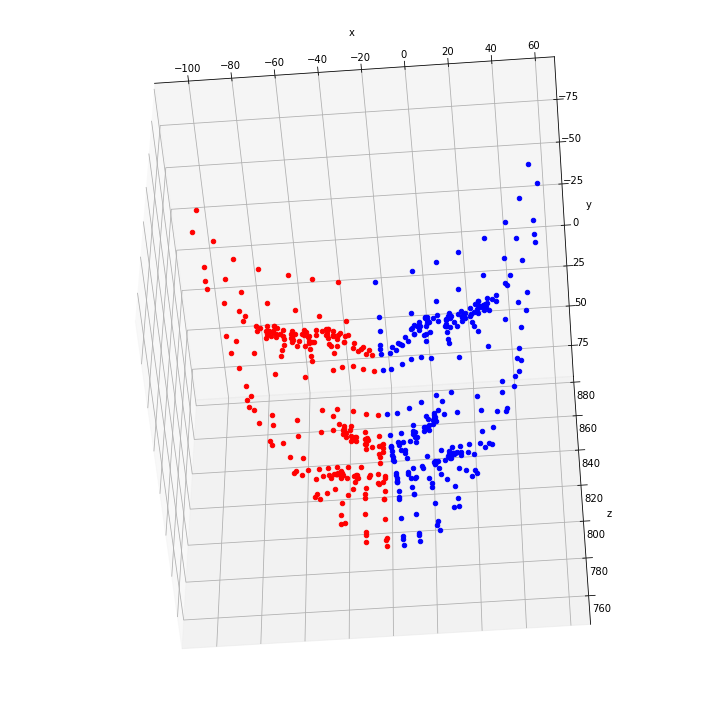

In [8]:
%matplotlib notebook
from matplotlib import pyplot
from pylab import figure
from mpl_toolkits.mplot3d import Axes3D

syn_name = 'KDVS'
patient = 'KDVS_1.jpg'
GENERAL_DIR = r"H:\Genetica Projecten\Facial Recognition\Studenten en Onderzoekers\Fien"
x, y, z, indexed_keypoints = load_landmarks(patient, GENERAL_DIR)

fig = figure(figsize=(10,10))
ax = Axes3D(fig)

for i in range(len(x)):
    if i in left:
        ax.scatter(x[i], y[i], z[i], color='b') 
    else:
        ax.scatter(x[i], y[i], z[i], color='r')
    

# # Calculate the coefficients. This line answers the initial question. 
# coeff_top = np.polyfit(x_top, y_top, 1)
# coeff_bot = np.polyfit(x_bot, y_bot, 1)

# # Let's compute the values of the line...
# poly_top = np.poly1d(coeff_top)
# poly_bot = np.poly1d(coeff_bot)
# x_axis_top = np.linspace(min(x_top), max(x_top),100)
# x_axis_bot = np.linspace(min(x_bot), max(x_bot),100)
# y_axis_top = poly_top(x_axis_top)
# y_axis_bot = poly_bot(x_axis_bot)
# z_axis_top = np.ones(100)* np.mean([z[295], z[288]])
# z_axis_bot = np.ones(100)* np.mean([z[174], z[295]])

# # ...and plot the points and the line
# ax.plot(x_axis_top, y_axis_top, z_axis_top)
# ax.plot(x_axis_bot, y_axis_bot, z_axis_bot)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
pyplot.show()

# Save distance data in seperate right and left csv files - patients

In [ ]:
GENERAL_DIR = r"H:\Genetica Projecten\Facial Recognition\Studenten en Onderzoekers\Fien"
file = GENERAL_DIR+ "\\features_facereader_landmarks_patient_groups.csv"

syn_rep_left, syn_rep_right = [],[]
with open(file, newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        landmarks_left, landmarks_right = [], []
        i = 1
        count = 0
        
        while i < len(row[1:]):
            if count in left:
                landmarks_left.append((float(row[i]), float(row[i+1]), float(row[i+2])))
            if count in right:
                landmarks_right.append((float(row[i]), float(row[i+1]), float(row[i+2])))       
            count += 1
            i+=3    
        
        feats_left = get_distances(landmarks_left)
        feats_right = get_distances(landmarks_right)
        syn_rep_left.append([row[0]] + feats_left)
        syn_rep_right.append([row[0]] + feats_right)
            
csv_syn_left = GENERAL_DIR+ "\\features_facereader_landmarks_distances_patient_groups_left.csv"
csv_syn_right = GENERAL_DIR+ "\\features_facereader_landmarks_distances_patient_groups_right.csv"

with open(csv_syn_left, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(syn_rep_left)
    
with open(csv_syn_right, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(syn_rep_right)

# Save distance data in seperate right and left csv files - controls

In [ ]:
GENERAL_DIR = r"H:\Genetica Projecten\Facial Recognition\Studenten en Onderzoekers\Fien"
file = GENERAL_DIR+ "\\features_facereader_landmarks_all_controls.csv"

control_rep_left, control_rep_right = [], []
with open(file, newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        landmarks_left, landmarks_right = [], []
        i = 1
        count = 0
        
        while i < len(row[1:]):
            if count in left:
                landmarks_left.append((float(row[i]), float(row[i+1]), float(row[i+2])))
            if count in right:
                landmarks_right.append((float(row[i]), float(row[i+1]), float(row[i+2])))
            count += 1
            i+=3    
                
        feats_left = get_distances(landmarks_left)
        feats_right = get_distances(landmarks_right)
        control_rep_left.append([row[0]] + feats_left)
        control_rep_right.append([row[0]] + feats_right)
        
csv_control_left = GENERAL_DIR+ "\\features_facereader_landmarks_distances_all_controls_left.csv"
csv_control_right = GENERAL_DIR+ "\\features_facereader_landmarks_distances_all_controls_right.csv"

with open(csv_control_left, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(control_rep_left)
    
with open(csv_control_right, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(control_rep_right)

In [ ]:
def load_data(syn, side, GENERAL_DIR):

    # files with representations
    syn_csv = GENERAL_DIR+ "\\features_facereader_landmarks_distances_patient_groups_{}.csv".format(side)
    ID_csv = GENERAL_DIR+ "\\features_facereader_landmarks_distances_all_controls_{}.csv".format(side)
    
    # open directories
    syn_dir = GENERAL_DIR+"\\{}\\{}-patients".format(syn, syn)
    ID_dir = GENERAL_DIR+ "\\{}\\{}-selected-ID-controls".format(syn, syn)

    # get list of filenames
    files_syn = [f for f in listdir(syn_dir) if (isfile(join(syn_dir, f))) and ".jpg" in f]
    files_ID = [f for f in listdir(ID_dir) if (isfile(join(ID_dir, f))) and ".jpg" in f]
    
    data, labels, indices_to_drop = [], [], []
    
    data_syn = []
    with open (syn_csv, newline='') as file:
        reader = csv.reader(file, delimiter=',')
        for index, row in enumerate(reader):
            if row[0] in files_syn: 
                rep = list(map(float, row[1:]))
                data_syn.append(rep)
                    
    data_ID = []                    
    with open (ID_csv, newline='') as file:
        reader = csv.reader(file, delimiter=',')
        for index, row in enumerate(reader):
            if row[0] in files_ID:
                rep = list(map(float, row[1:]))
                data_ID.append(rep)
    

    for index, (syn_item, ID_item) in enumerate(zip(data_syn, data_ID)):
        if len(syn_item) == 36315 and len(ID_item) == 36315: # hardcoded for now
            data.append(np.array(syn_item))
            labels.append(1)
            data.append(np.array(ID_item))
            labels.append(0)

    return np.array(data), np.array(labels)

# Plot important features for both sides

In [15]:
GENERAL_DIR = r"H:\Genetica Projecten\Facial Recognition\Studenten en Onderzoekers\Fien"
syn_list = ['ADNP', 'ANKRD11'] #, 'CDK13', 'DEAF1', 'DYRK1A', 'EHMT1', 'FBXO11', 'SON', 'WAC', 'YY1', 'KDVS']

# open file for scores 
results_file = open("results_facereader_landmarks_left_right.txt", "w")
importance_indices_list = []

for syn in tqdm(syn_list): 
    indices_left, indices_right = [], []

    for side in ["right"]: #"left", "right"]:

        data, labels = load_data(syn, side, GENERAL_DIR)
        results_file.write("Syndrome {} with {} patients and {} controls - {}\n".format(syn, labels.tolist().count(1), labels.tolist().count(0), side))

#         ### RANDOM FOREST SCORE ###
#         data = normalize(data, i) 
#         all_y, all_probs, all_preds = [], [], [] 
#         loo = LeaveOneOut()

#         for train, test in loo.split(data):
#             all_y.append(labels[test])
#             model = RandomForestClassifier(n_estimators=est)
#             model = model.fit(data[train], labels[train])
#             all_probs.append(model.predict_proba(data[test].reshape(1, -1))[:,1])
#             all_preds.append(model.predict(data[test].reshape(1, -1)))

#         # based on all predictions make aroc curve and confusion matrix
#         aroc = roc_auc_score(all_y, all_probs)
#         tn, fp, fn, tp = confusion_matrix(all_y, all_preds).ravel()
#         spec = tn / (tn+fp)  
#         sens = tp / (tp+fn)
#         results_file.write("AROC: {:.4f}, spec: {:.4f}, sens: {:.4f}\n\n".format(aroc, spec, sens))

        print(data.shape)
        print(data[0].shape)
        
        ### SAVE MOST IMPORTANT INDICES LEFT/RIGHT ###
        forest = RandomForestClassifier(n_estimators=10,random_state=0) # 10 has been found with best aroc scores
        forest.fit(data, labels)
        importances = forest.feature_importances_
        std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
        indices = np.argsort(importances)[::-1]

        nr_feat = 10
        important_indices = indices[0:nr_feat] # aantal features

        print("{} features have an importance of {:.4f}".format(nr_feat, sum(importances[important_indices])))

        if side == "left":
            indices_left = important_indices
        else:
            indices_right = important_indices
    
    importance_indices_list.append({syn: {"left": indices_left, "right": indices_right}})
    

  0%|                                                    | 0/2 [00:36<?, ?it/s]

36
28680
28680
28680
28680
28680
36
36
28680
28680
36
28680
36
28680
28680
28680
28680
28680
28680
28680
36
28680
36
28680
28680
36
36
28680
36
28680
28680
28680
36
28680
28680
36
28680
28680
36
36
36
36
28680
28680
36
28680
28680
28680
28680
36
36
28680
36
28680
36
28680
28680
28680
36
28680
36
36
36
28680
28680
28680
(0,)


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
print(importance_indices_list)

In [ ]:
### PLOT MOST IMPORTANT FEATURES ###
file = GENERAL_DIR+ "\\features_facereader_landmarks_patient_groups.csv"


# Find random image of syndrome and retrieve keypoints 
with open(file, newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        if syn in row[0]:
            landmarks_left, landmarks_right = [], []
            i = 1
            count = 0

            while i < len(row[1:]):
                if count in left:
                    landmarks_left.append((float(row[i]), float(row[i+1]), float(row[i+2])))
                elif count in right:
                    landmarks_right.append((float(row[i]), float(row[i+1]), float(row[i+2])))
                else:
                    print("Error")

                count += 1
                i+=3    
            break
            
fig = figure(figsize=(10,10))
ax = Axes3D(fig)

# plot the left and right side
for [x, y, z] in landmarks_left:
    ax.scatter(x, y, z, color='b') 
for [x, y, z] in landmarks_right:
    ax.scatter(x, y, z, color='r') 
        
# get keypoint pairs of indices most important features
pairs = get_pairs(len(left))

# plot the most important features (pairwise distance)
for index, [a,b] in enumerate(pairs):
    if index in indices_left:
        [x, y, z] = landmarks_left[a]
        [x2, y2, z2] = landmarks_left[b]
        ax.plot((x, x2), (y, y2), (z, z2))
        
    if index in indices_right:
        [x, y, z] = landmarks_right[a]
        [x2, y2, z2] = landmarks_right[b]
        ax.plot((x, x2), (y, y2), (z, z2))

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
pyplot.show()

In [13]:
# syn_name = 'KDVS'
# patient = 'KDVS_1.jpg'
# GENERAL_DIR = r"H:\Genetica Projecten\Facial Recognition\Studenten en Onderzoekers\Fien"

# x, y, z, indexed_keypoints = fr_plot(patient, GENERAL_DIR)

# data_dir = GENERAL_DIR + "\\{}".format(syn_name) 
# nr_feats = 10

# _, _, indices = get_important_features(syn_name, data_dir)
# important_keypoints = get_keypoints_from_indices(indices)
# keypoints_3d = get_patient_keypoints(important_keypoints, indexed_keypoints)

